---
title: TF Binding prediction project
date: 2025-04-03
author: Sofia Salazar
categories:
    - gene46100
    - project
    - notebook
---

# TF binding prediction model

The goal of this project is to create a neural network model that predicts TF binding strength in a DNA sequence.

To do this, we have extracted 300 base pair-long DNA sequences that have a predicted binding site(s) from a TF, from a couple of chromosomes.

The training data is the following:

- The sequences files: `chr#_sequences.txt.gz` store the 300 bp-long DNA sequences. A "window_name" in the format `chr#_start_end` has been assigned to each one.

- The scores files: `chr#_scores.txt.gz` store a 300 bases long vector for each DNA sequence. Each position in these vectors correspond to a the sequence position. The values for each position represent the "binding score" that was predicted to that site by [Homer](http://homer.ucsd.edu/homer/motif/index.html), which is a widely used tool to discover motif binding sites for a given TF across the genome.


### 1. Read-in the data

The data files for a couple of chromosomes are stored in the following [link](https://uchicago.box.com/s/eajhnujlaxnd5441sv3dt73pfoxvgh). Download them to your local folder.

Let's explore how the sequence and score data look like:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

Define data paths, this should be changed to your personal paths:

In [ ]:
PROJECT = '/Users/sofiasalazar/Library/CloudStorage/Box-Box/imlab-data/Courses/AI-in-Genomics-2025/'
DATA = os.path.join(PROJECT, 'data')

**Sequence data for chromosome 22**

In [4]:
sequences = pd.read_csv(os.path.join(DATA, 'chr22_sequences.txt.gz'), sep="\t", compression='gzip')

In [5]:
sequences.head()

,sequence,window_name
0,GCAAGACTCAGTCTCAAGGAAAAAAAAAAGCTCGAAAAATGTTTGC...,chr22_10510500_10510799
1,AATCAAAAAGAATATTAGAAAACAAGCTGACAAAAAAATAAAAAAA...,chr22_10512900_10513199
2,AGAAAAAGATATAAAGGCATCCAAATTGGAAAGGAAGAAGTAAGTA...,chr22_10514100_10514399
3,CAAATGGATTGAAGACTTAAATGTAAGAACTAAAGCTGTAAAACTA...,chr22_10515300_10515599
4,AAAATAGACCTACCATATGATGCAGCAATCCCACTTGTGGGCATTT...,chr22_10515900_10516199


In [6]:
sequences.shape

(23139, 2)

**TF binding scores for chromosome 22**

Here, each column has 300 values for each sequence, each value is the TF binding score for each position of the sequence. Most positions have '0' as no motif is predicted to bind at those positions. One motif is a couple of bp-long and all of those bp will have the same score since they belong to the same motif.

In [7]:
scores = pd.read_csv(os.path.join(DATA, 'chr22_scores.txt.gz'), sep="\t", compression='gzip')

In [19]:
np.array(scores.iloc[:, 0])

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 9.708916, 9.708916, 9.708916,
       9.708916, 9.708916, 9.708916, 9.708916, 9.708916, 9.708916,
       9.708916, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.   

Take a look at how these score vectors look like, the blue sections represent the predicted binding sites for this TF:

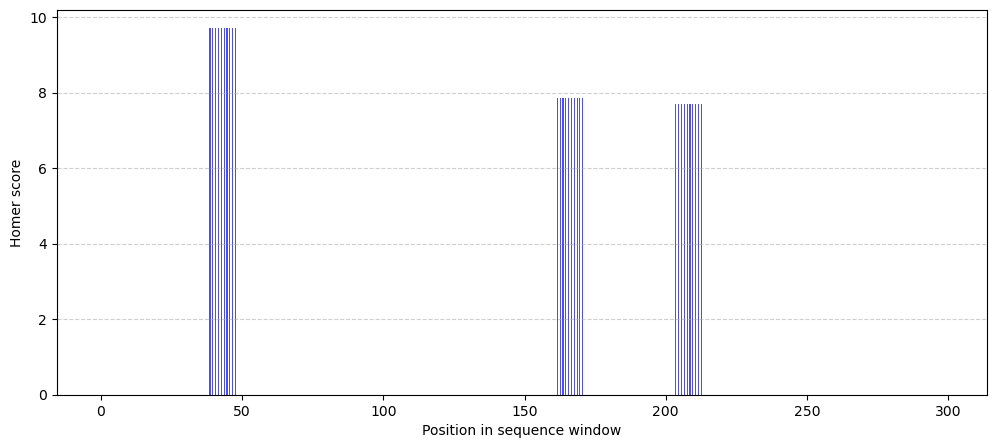

In [20]:
x = np.arange(300)
bar_width = 0.4
plt.figure(figsize=(12, 5))
plt.bar(x - bar_width, scores.iloc[:, 0], width=bar_width, label="Predicted", alpha=0.7, color='b')
plt.xlabel("Position in sequence window")
plt.ylabel("Homer score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 2. Model training

Now, the goal is to use these sequences to train a neural network model that predicts the scores vectors. Overall, the structure of the code should more or less follow these steps:

1. One-hot-encode the DNA sequences

2. Split sequences and their corresponding scores into training, test and validation sets

3. Build dataloaders for the training and test sets using sequences as predictor features and the scores as targets

4. Define a NN model architecture

5. Train the model

6. Test the model on the test sequences

This process will be iterative as you find an optimal set of hyperparameters. Please share your best-performing model and we will test it on a set of held-out-data.

**Additional notes**

- Note how the scores are values greater than 1, you can try binarizing these values so they are between 0 and 1 and compare between models

- To assess performance, you can use the following code to compute correlations between predicted scores and the ground truth


In [ ]:
from scipy.stats import pearsonr
def plot_comparison(pred, obs):
  r_value = pearsonr(pred, obs)
  x = np.arange(len(pred))
  bar_width = 0.4
  plt.figure(figsize=(12, 5))
  plt.bar(x - bar_width, pred, width=bar_width, label="Predicted", alpha=0.7, color='b')
  plt.bar(x + bar_width, obs, width=bar_width, label="Observed", alpha=0.7, color='r')
  plt.xlabel("Position sequence window")
  plt.ylabel("Value")
  plt.title("Comparison of sequence scores")
  plt.legend(title=f"Pearson R: {r_value:.2f}")
  plt.grid(axis='y', linestyle='--', alpha=0.6)
  plt.show()